In [30]:
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
df = pd.read_csv("./data/1900-01-01-2025-01-31-Central_America.csv")[["year", "country", "event_type", "actor1", "location"]]
df.sample(15)

,year,country,event_type,actor1,location
23771,2019,Guatemala,Battles,Unidentified Gang (Guatemala),Mixco
31880,2018,Guatemala,Riots,Rioters (Guatemala),Villa Canales
3138,2023,Honduras,Protests,Protesters (Honduras),San Pedro Sula
11667,2022,Honduras,Protests,Protesters (Honduras),Choluteca
23782,2019,Guatemala,Battles,Unidentified Gang (Guatemala),Villa Nueva
409,2024,Guatemala,Violence against civilians,Unidentified Gang (Guatemala),Pastores
12629,2021,Panama,Protests,Protesters (Panama),Chitre
11903,2022,Honduras,Violence against civilians,Unidentified Armed Group (Honduras),El Paraiso
15199,2021,Honduras,Protests,Protesters (Honduras),San Pedro Sula
5192,2023,Belize,Battles,Unidentified Gang (Belize),Belize City


In [32]:
df.columns

Index(['year', 'country', 'event_type', 'actor1', 'location'], dtype='object')

In [33]:
df = pd.read_csv("./data/1900-01-01-2025-01-31-Central_America.csv")
df.sample(5)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
32126,SLV1430,17 January 2018,2018,1,Political violence,Violence against civilians,Attack,Unidentified Gang (El Salvador),NaN,Political militia,...,Izalco,13.7447,-89.6731,1,La Prensa Grafica,National,"On 17 January 2018, in Izalco, Sonsonate, gang...",1,NaN,1607554532
25571,SLV251,24 April 2019,2019,1,Political violence,Battles,Armed clash,Police Forces of El Salvador (2009-2019),NaN,State forces,...,Ahuachapan,13.9214,-89.8450,2,El Salvador.com,National,"On 24 April 2019, a police officer clashed wit...",0,NaN,1586300984
7756,HND5256,17 November 2022,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (Honduras),Labor Group (Honduras); Women (Honduras),Protesters,...,Choloma,15.6144,-87.9530,1,El Pais (Honduras),National,"On 17 November 2022, in Choloma, Cortes, a gro...",0,crowd size=no report,1721086507
16484,HND5557,19 February 2021,2021,1,Demonstrations,Protests,Peaceful protest,Protesters (Honduras),Labor Group (Honduras),Protesters,...,Tegucigalpa,14.0818,-87.2068,1,HCH,National,"On 19 February 2021, in Tegucigalpa, Francisco...",0,crowd size=no report,1715049329
1098,SLV4270,16 July 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (El Salvador),MOVIR: Movement of Victims of the Regime; UNID...,Protesters,...,San Salvador,13.6894,-89.1872,1,La Prensa Grafica,National,"On 16 July 2024, in San Salvador, San Salvador...",0,crowd size=no report,1729592873


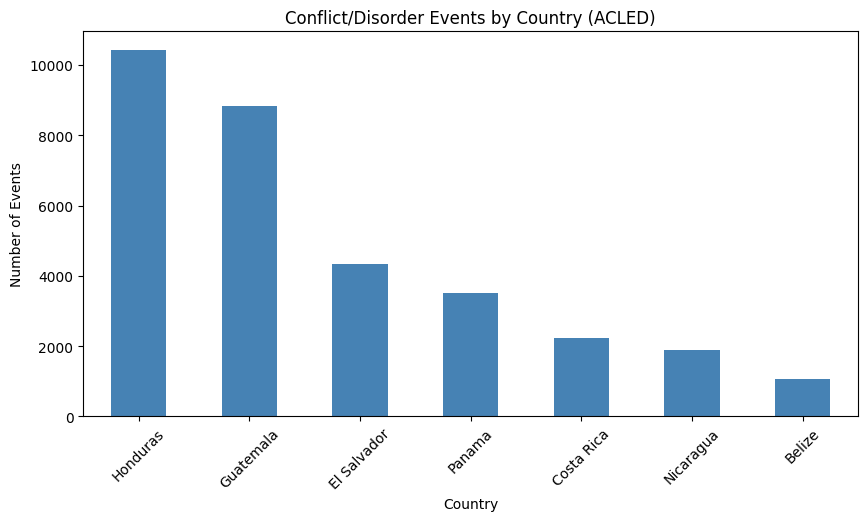

In [34]:
# Aggregate events by country
event_counts = df['country'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 5))
event_counts.plot(kind='bar', color='steelblue')
plt.xlabel("Country")
plt.ylabel("Number of Events")
plt.title("Conflict/Disorder Events by Country (ACLED)")
plt.xticks(rotation=45)
plt.show()

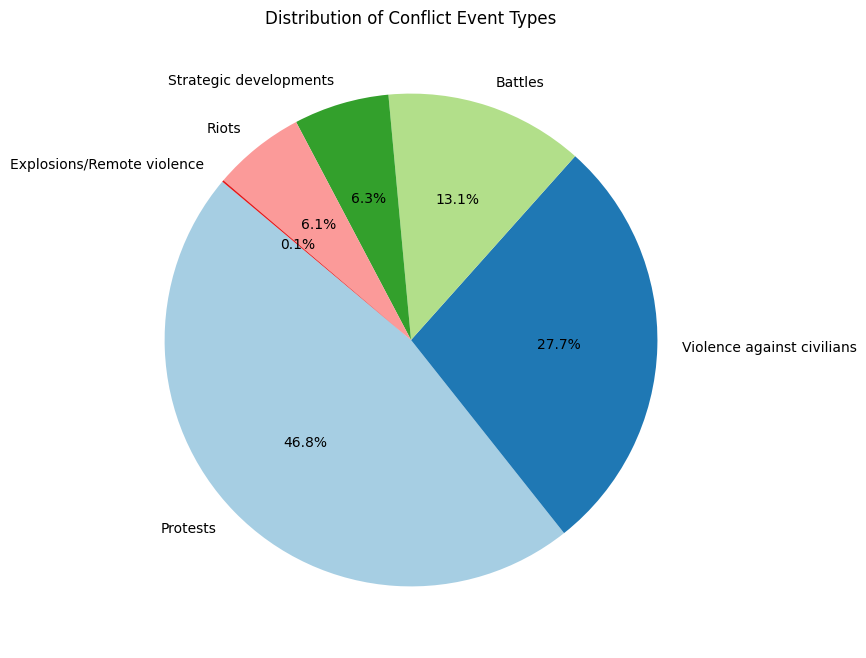

In [35]:
# Count occurrences of each event type
event_counts = df['event_type'].value_counts()

# Define a color map manually
colors = plt.cm.Paired.colors  # Alternative: plt.get_cmap('coolwarm').colors

# Plot pie chart
plt.figure(figsize=(8, 8))
event_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)
plt.ylabel('')  # Hide y-label for clarity
plt.title("Distribution of Conflict Event Types")
plt.show()


<Figure size 1200x600 with 0 Axes>

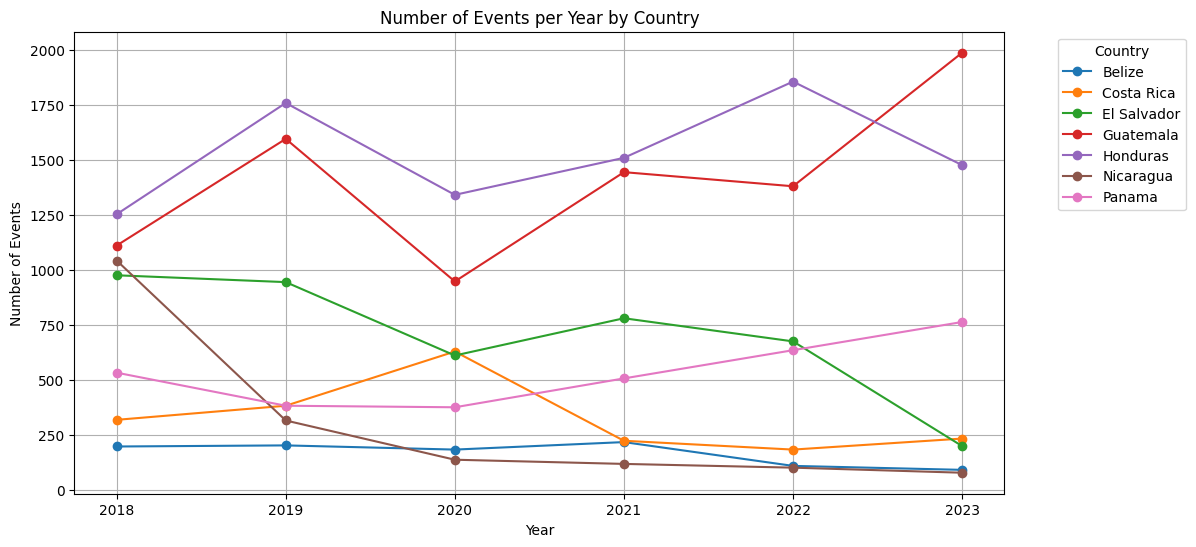

In [36]:
# Convert event_date to datetime if not already
df = df[~df["year"].isin([2025, 2024])]

df["event_date"] = pd.to_datetime(df["event_date"])

# Extract year if not already present
df["year"] = df["event_date"].dt.year

# Grouping data by country and year
df_grouped = df.groupby(["country", "year"]).size().reset_index(name="event_count")

# Pivoting for multiple lines (one per country)
df_pivot = df_grouped.pivot(index="year", columns="country", values="event_count")

# Plotting
plt.figure(figsize=(12, 6))
df_pivot.plot(kind="line", marker="o", figsize=(12, 6))
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.title("Number of Events per Year by Country")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


In [37]:
df = pd.read_csv("./data/1900-01-01-2025-01-31-Central_America.csv")
df.sample(5)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
17053,HND3075,03 January 2021,2021,2,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Honduras),NaN,Political militia,...,Danli,14.0333,-86.5833,2,El Heraldo (Honduras),National,"Around 3 January 2021 (as reported), near Danl...",1,NaN,1618492698
26060,GTM1099,13 March 2019,2019,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Guatemala),NaN,Political militia,...,Villa Nueva,14.5269,-90.5875,1,Dialogos - Observatorio sobre la Violencia,Local partner-National,"On 13 March 2019, in Villa Nueva, Guatemala, a...",0,NaN,1591640384
5017,GTM6906,20 July 2023,2023,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Guatemala),NaN,Political militia,...,El Triunfo,14.7085,-92.1424,1,La Hora (Guatemala),National,"On 20 July 2023, in El Triunfo, San Marcos, at...",0,local administrators; women targeted: politici...,1734465860
3172,CRI1959,25 October 2023,2023,1,Demonstrations,Protests,Peaceful protest,Protesters (Costa Rica),NaN,Protesters,...,Limon,9.9907,-83.0360,1,CR Hoy; La Teja,National,"On 25 October 2023, in Limon, Limon, over 700 ...",0,crowd size=over 700,1700524097
17696,HND2062,05 November 2020,2020,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Honduras),NaN,Political militia,...,Tegucigalpa,14.0818,-87.2068,1,El Heraldo (Honduras),National,"On 5 November 2020, in Tegucigalpa (Francisco ...",1,NaN,1715049325


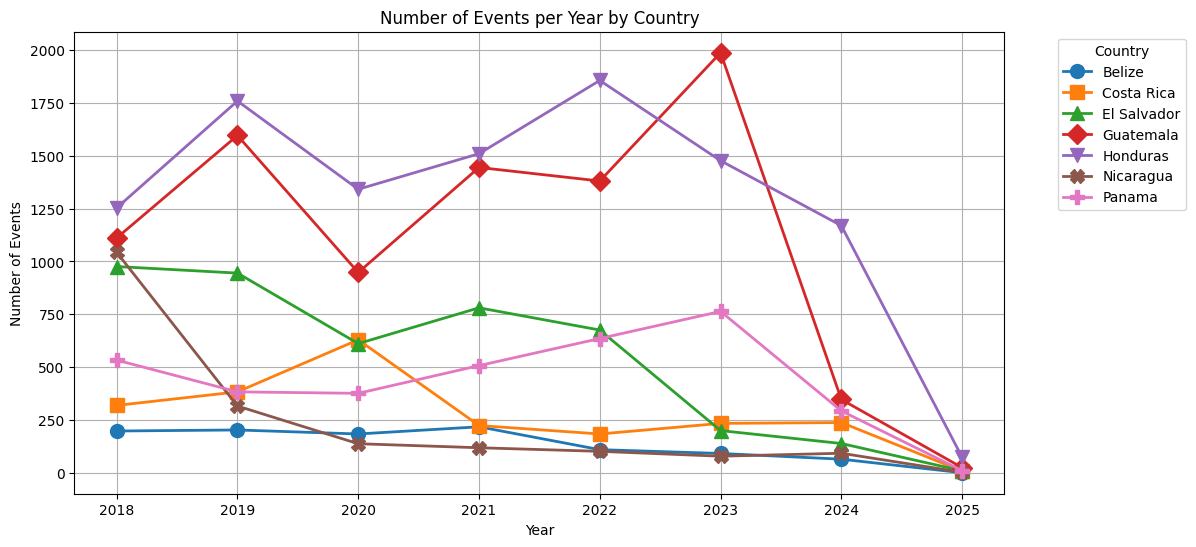

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'year' column is of integer type
df["year"] = df["year"].astype(int)

# Grouping data by country and year, counting the number of events
df_grouped = df.groupby(["country", "year"]).size().reset_index(name="event_count")

# Convert columns to NumPy arrays to avoid multi-dimensional indexing issues
df_grouped["year"] = df_grouped["year"].values
df_grouped["event_count"] = df_grouped["event_count"].values

# Define unique markers for each country
unique_countries = df_grouped["country"].unique()
markers = ["o", "s", "^", "D", "v", "X", "P", "*", "h", "<", ">"]  # Various marker styles
marker_dict = {country: markers[i % len(markers)] for i, country in enumerate(unique_countries)}

# Plot with different markers for each country
plt.figure(figsize=(12, 6))

for country in unique_countries:
    country_data = df_grouped[df_grouped["country"] == country]
    plt.plot(
        country_data["year"].values,  # Ensure NumPy array format
        country_data["event_count"].values,  # Ensure NumPy array format
        marker=marker_dict[country],  # Assign unique marker
        linestyle="-",  # Keep lines for clarity
        label=country,
        markersize=10,
        linewidth=2
    )

plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.title("Number of Events per Year by Country")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


/var/folders/qv/hlnb1jfx68x_r2g75s1fkjlm0000gq/T/ipykernel_3931/3922556604.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="country", y="fatalities", data=df_fatalities, palette=["#FFD700", "#32CD32", "#87CEEB", "#FF69B4", "#FFA500"])
/var/folders/qv/hlnb1jfx68x_r2g75s1fkjlm0000gq/T/ipykernel_3931/3922556604.py:9: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="country", y="fatalities", data=df_fatalities, palette=["#FFD700", "#32CD32", "#87CEEB", "#FF69B4", "#FFA500"])


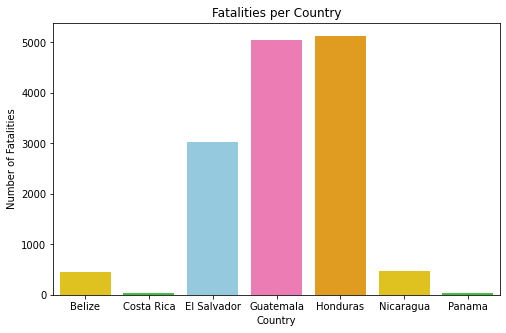

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by country to sum fatalities
df_fatalities = df.groupby("country")["fatalities"].sum().reset_index()

# Plot: Misleading "Happy" Color Palette for Fatalities
plt.figure(figsize=(8, 5))
sns.barplot(x="country", y="fatalities", data=df_fatalities, palette=["#FFD700", "#32CD32", "#87CEEB", "#FF69B4", "#FFA500"])
plt.xlabel("Country")
plt.ylabel("Number of Fatalities")
plt.title("Fatalities per Country")
plt.show()


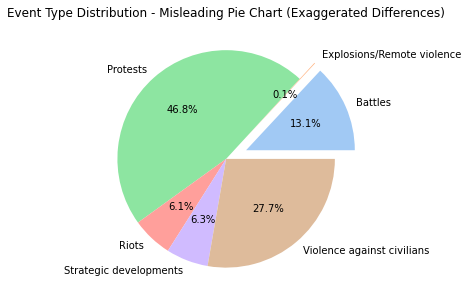

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by event_type to count occurrences (ensuring correct column names)
df_events = df.groupby("event_type").size().reset_index(name="event_count")

# -------------------------------
# Chart 1: Misleading Pie Chart (Exaggerated Slice Explosion)
# -------------------------------
plt.figure(figsize=(8, 5))
explode_values = [0.2 if i < 2 else 0 for i in range(len(df_events))]  # Exaggerate top 2 slices
plt.pie(df_events["event_count"], labels=df_events["event_type"], autopct='%1.1f%%', explode=explode_values, colors=sns.color_palette("pastel"))
plt.title("Event Type Distribution - Misleading Pie Chart (Exaggerated Differences)")
plt.show()

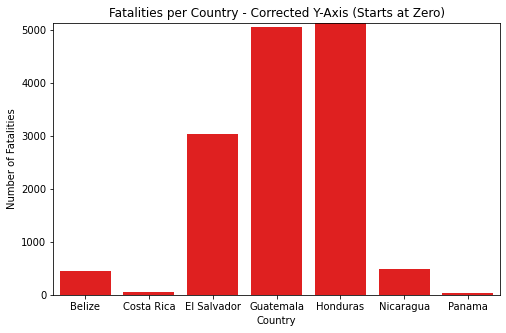

In [19]:
# -------------------------------
# Chart 2: Corrected Visualization (Full Y-Axis)
# -------------------------------
plt.figure(figsize=(8, 5))
sns.barplot(x="country", y="fatalities", data=df_fatalities, color="red")
plt.ylim(0, df_fatalities["fatalities"].max())  # Proper Y-axis starting at 0
plt.xlabel("Country")
plt.ylabel("Number of Fatalities")
plt.title("Fatalities per Country - Corrected Y-Axis (Starts at Zero)")
plt.show()


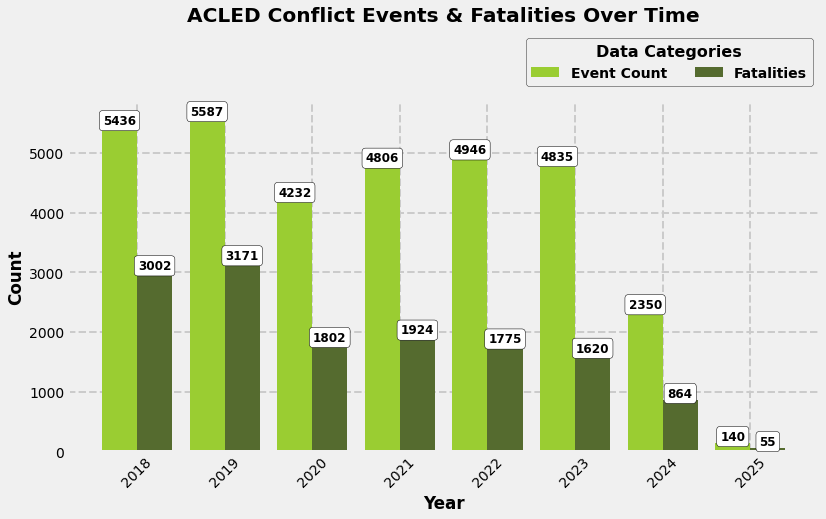

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group data by year
df_yearly = df.groupby("year").agg({"event_id_cnty": "count", "fatalities": "sum"}).reset_index()
df_yearly.rename(columns={"event_id_cnty": "Event Count", "fatalities": "Fatalities"}, inplace=True)

# Define bar width and positions
bar_width = 0.4
x = np.arange(len(df_yearly["year"]))

plt.style.use("fivethirtyeight")

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create bar chart
ax.bar(x - bar_width/2, df_yearly["Event Count"], width=bar_width, color="#9ACD32", label="Event Count")
ax.bar(x + bar_width/2, df_yearly["Fatalities"], width=bar_width, color="#556B2F", label="Fatalities")

# Add labels on top of bars with white background
for i, (event, fatal) in enumerate(zip(df_yearly["Event Count"], df_yearly["Fatalities"])):
    ax.text(x[i] - bar_width/2, event + 50, str(event), ha='center', fontsize=12, fontweight="bold", 
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))
    ax.text(x[i] + bar_width/2, fatal + 50, str(fatal), ha='center', fontsize=12, fontweight="bold", 
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(df_yearly["year"], rotation=45)
ax.set_xlabel("Year", fontweight="bold")
ax.set_ylabel("Count", fontweight="bold")
ax.set_title("ACLED Conflict Events & Fatalities Over Time", pad=80, fontweight="bold")  # Add space for legend

# Move legend above the chart, between title and plot
legend = ax.legend(title="Data Categories", fontsize=14, title_fontsize=16, loc="upper center", bbox_to_anchor=(0.8, 1.20), 
          fancybox=True, edgecolor="black", frameon=True, ncol=2)

# Bold legend text manually
for text in legend.get_texts():
    text.set_fontweight("bold")
    
# Bold legend title manually
legend.get_title().set_fontweight("bold")

# Overuse of gridlines
ax.grid(axis="both", linestyle="--", linewidth=2, alpha=1)

# Show plot
plt.show()


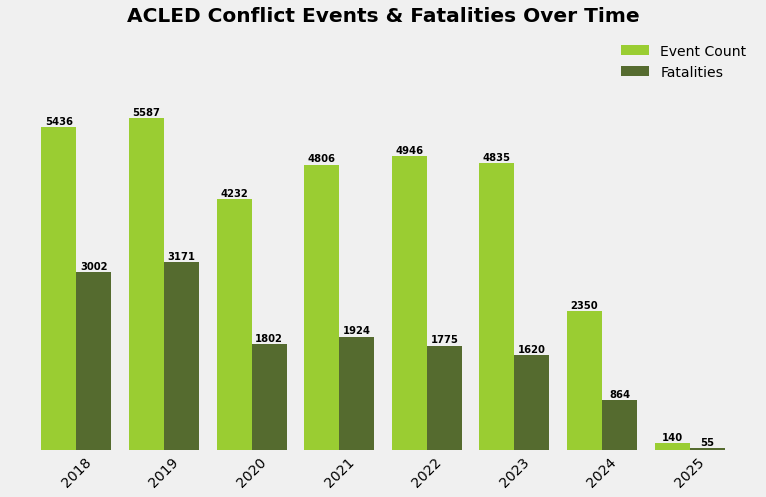

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group data by year
df_yearly = df.groupby("year").agg({"event_id_cnty": "count", "fatalities": "sum"}).reset_index()
df_yearly.rename(columns={"event_id_cnty": "Event Count", "fatalities": "Fatalities"}, inplace=True)

# Define bar width and positions
bar_width = 0.4
x = np.arange(len(df_yearly["year"]))

plt.style.use("fivethirtyeight")

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create bar chart
ax.bar(x - bar_width/2, df_yearly["Event Count"], width=bar_width, color="#9ACD32", label="Event Count")
ax.bar(x + bar_width/2, df_yearly["Fatalities"], width=bar_width, color="#556B2F", label="Fatalities")

# Add labels on top of bars
for i, (event, fatal) in enumerate(zip(df_yearly["Event Count"], df_yearly["Fatalities"])):
    plt.text(x[i] - bar_width/2, event + 50, str(event), ha='center', fontsize=10, fontweight="bold", color="black")
    plt.text(x[i] + bar_width/2, fatal + 50, str(fatal), ha='center', fontsize=10, fontweight="bold", color="black")


# # Add labels on top of bars with white background
# for i, (event, fatal) in enumerate(zip(df_yearly["Event Count"], df_yearly["Fatalities"])):
#     ax.text(x[i] - bar_width/2, event + 50, str(event), ha='center', fontsize=12, fontweight="bold", 
#             bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))
#     ax.text(x[i] + bar_width/2, fatal + 50, str(fatal), ha='center', fontsize=12, fontweight="bold", 
#             bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(df_yearly["year"], rotation=45)
# ax.set_xlabel("Year")
# ax.set_ylabel("Count")
ax.set_title("ACLED Conflict Events & Fatalities Over Time", pad=80, fontweight="bold")  # Add space for legend
# Remove y ticks
plt.yticks([])

# Move legend above the chart, between title and plot
legend = ax.legend(fontsize=14, title_fontsize=16, loc="upper center", bbox_to_anchor=(0.9, 1.20), 
          fancybox=True, edgecolor="black", frameon=False)

# # Bold legend text manually
# for text in legend.get_texts():
#     text.set_fontweight("bold")
    
# # Bold legend title manually
# legend.get_title().set_fontweight("bold")

# Overuse of gridlines
ax.grid(axis="both", linestyle="--", linewidth=0, alpha=0)

# Show plot
plt.show()


In [22]:
df.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp'],
      dtype='object')

In [23]:
df["sub_event_type"].unique()

array(['Attack', 'Peaceful protest', 'Armed clash',
       'Looting/property destruction', 'Other', 'Mob violence',
       'Protest with intervention', 'Violent demonstration', 'Arrests',
       'Abduction/forced disappearance', 'Remote explosive/landmine/IED',
       'Sexual violence', 'Change to group/activity',
       'Disrupted weapons use', 'Excessive force against protesters',
       'Grenade', 'Agreement'], dtype=object)

In [24]:
df["country"].unique()

array(['Guatemala', 'Honduras', 'Nicaragua', 'Panama', 'El Salvador',
       'Costa Rica', 'Belize'], dtype=object)

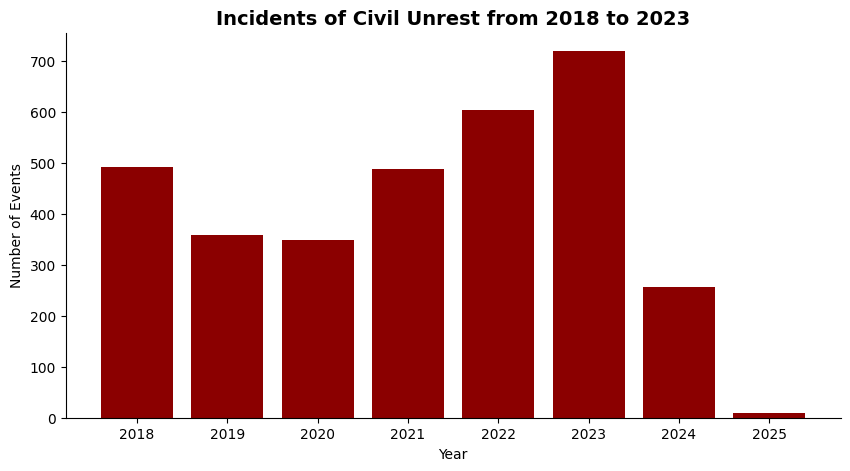

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("default")




df_misleading = df[df["sub_event_type"].isin(['Peaceful protest', 'Violent demonstration'])]

df_misleading = df_misleading[df_misleading["country"] == "Panama"]

# Grouping event counts by year and sub_event_type
df_event_types = df_misleading.groupby(["year", "sub_event_type"]).size().unstack(fill_value=0)

# -------------------------------
# Misleading Chart: Lumping All Events into "Violent Events"
# -------------------------------
df_misleading = df_event_types.sum(axis=1)  # Summing all event types to make them look violent

# plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(df_misleading.index, df_misleading.values, color="darkred", label="Violent Events")
ax.spines["top"].set_visible(False) # Remove border splines
ax.spines["right"].set_visible(False) # Remove border splines
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.title("Incidents of Civil Unrest from 2018 to 2023", fontsize=14, fontweight="bold")
# plt.legend(fontsize=12, loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0)
plt.show()

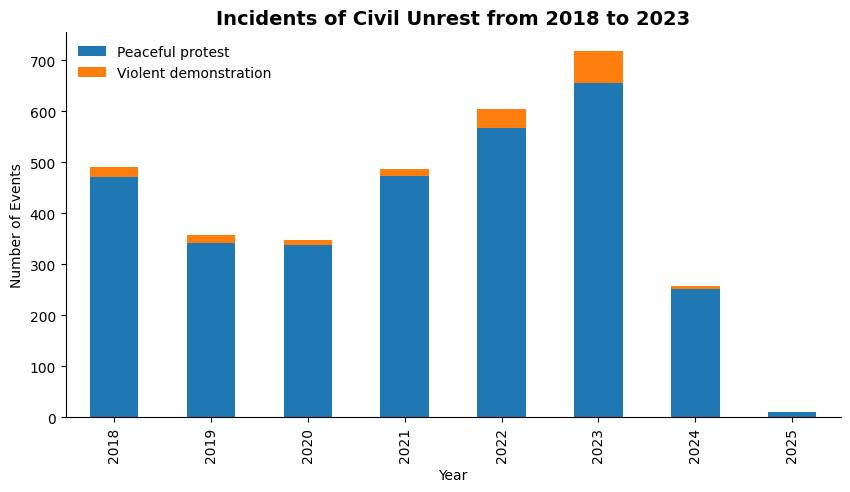

In [26]:

# -------------------------------
# Truthful Chart: Categorizing Events Properly
# -------------------------------
fig, ax = plt.subplots(figsize=(10, 5))
df_event_types[["Peaceful protest", "Violent demonstration"]].plot(kind="bar", stacked=True, ax = ax)
ax.spines["top"].set_visible(False) # Remove border splines
ax.spines["right"].set_visible(False) # Remove border splines
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.title("Incidents of Civil Unrest from 2018 to 2023", fontsize=14, fontweight="bold")
plt.legend(fontsize=10, title_fontsize=12, loc="upper left", frameon=False)
plt.grid(axis="y", linestyle="--", alpha=0)
plt.show()
